**NAME - PRAKHAR BHARDWAJ**


**ANDREW ID - prakharb**


**Q1**

# Principal Component Analysis
The goal of this question is to build a conceptual understanding of dimensionality reduction using PCA and implement it on a toy dataset. You’ll only have to use numpy and matplotlib for this question.

In [22]:
# (a) Load data (features)
import numpy as np
def load_data():
  data_ = np.load("features.npy")
  data = ((data_ - np.mean(data_,axis = 0)) / np.std(data_,axis=0))    # Standardized data = data
  #print(np.sum(data,axis =0))
  print("Mean of standardized data")
  print(np.mean(data,axis=0)) 
  print("Standard deviation of standardized data")
  print(np.std(data,axis=0))
  return data  
call_f1 = load_data()

Mean of standardized data
[-1.69031455e-15 -1.63702385e-15 -1.48251781e-15 -1.62314606e-15
  3.01980663e-16 -7.43109278e-16  6.81676937e-16  4.44089210e-16]
Standard deviation of standardized data
[1. 1. 1. 1. 1. 1. 1. 1.]


In [23]:
# (b) Perform eigen decomposition and return eigen pairs in desecending order of eigen values
def eigendecomp(data):
  covmatrix_data = np.cov(data , rowvar = False)
  eigen_values , eigen_vectors = np.linalg.eigh(covmatrix_data)     # calculation of the covarience matrix
  sorted_index = np.argsort(eigen_values)[::-1]                     # Sort the eigenvalues in descending order
  sorted_eig_vals = eigen_values[sorted_index]                      # Sort the eigenvectors
  sorted_eig_vecs = eigen_vectors[:,sorted_index]
  print(f"Sorted eigen values - {sorted_eig_vals}")
  print(f"Sorted eigen vectors - {sorted_eig_vecs}")
  return (sorted_eig_vals, sorted_eig_vecs)  

sorted_eig_vals, sorted_eig_vecs= eigendecomp(call_f1)

Sorted eigen values - [ 4.74298961e+00  2.29585309e+00  7.76910512e-01  2.04172901e-01
  3.37651661e-02  7.57426986e-16 -1.67385263e-16 -5.46023115e-16]
Sorted eigen vectors - [[-0.39124937  0.13884872  0.46160937 -0.58034539  0.24934936 -0.15384955
   0.38524862  0.2085658 ]
 [ 0.11687696 -0.4391715   0.78711289  0.2905579  -0.12725786 -0.13431522
  -0.22884157  0.05379557]
 [-0.40655289  0.29080021  0.13961871  0.12636707 -0.54994554 -0.15582815
   0.12899147 -0.60936579]
 [-0.39944906  0.26454833  0.16206048  0.54404218  0.49904279  0.44559608
  -0.00806499 -0.02333494]
 [-0.3778555  -0.35426671 -0.07790627 -0.42060984  0.12822569  0.24174799
  -0.60535165 -0.32772512]
 [-0.09816172 -0.64299795 -0.11941452  0.04972667 -0.0795516   0.36920121
   0.6290321  -0.14787147]
 [-0.45509399 -0.03231459 -0.12200908  0.08034689 -0.51935676  0.17174602
  -0.14216797  0.67161262]
 [-0.38587285 -0.30545597 -0.29393481  0.28457653  0.27864817 -0.71498471
   0.01294074  0.03744226]]


Sorted eigen values - [ 4.74298961e+00  2.29585309e+00  7.76910512e-01  2.04172901e-01
  3.37651661e-02  7.57426986e-16 -1.67385263e-16 -5.46023115e-16]
Sorted eigen vectors - [[-0.39124937  0.13884872  0.46160937 -0.58034539  0.24934936 -0.15384955
   0.38524862  0.2085658 ]
 [ 0.11687696 -0.4391715   0.78711289  0.2905579  -0.12725786 -0.13431522
  -0.22884157  0.05379557]
 [-0.40655289  0.29080021  0.13961871  0.12636707 -0.54994554 -0.15582815
   0.12899147 -0.60936579]
 [-0.39944906  0.26454833  0.16206048  0.54404218  0.49904279  0.44559608
  -0.00806499 -0.02333494]
 [-0.3778555  -0.35426671 -0.07790627 -0.42060984  0.12822569  0.24174799
  -0.60535165 -0.32772512]
 [-0.09816172 -0.64299795 -0.11941452  0.04972667 -0.0795516   0.36920121
   0.6290321  -0.14787147]
 [-0.45509399 -0.03231459 -0.12200908  0.08034689 -0.51935676  0.17174602
  -0.14216797  0.67161262]
 [-0.38587285 -0.30545597 -0.29393481  0.28457653  0.27864817 -0.71498471
   0.01294074  0.03744226]]

Cumulative var

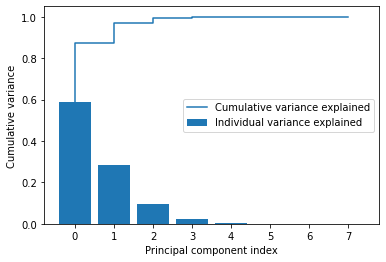

In [31]:
# (c) Evaluate using variance_explained as the metric
print(f"Sorted eigen values - {sorted_eig_vals}")
print(f"Sorted eigen vectors - {sorted_eig_vecs}")
def eval():
  total_eig_vals = np.sum(sorted_eig_vals)
  a = []
  for i in sorted_eig_vals:
    x = i/total_eig_vals 
    a.append(x)
  var_exp = np.array(a)
  return (var_exp)
var_exp = eval()

# Plot of explained variance against cumulative explained variance

import matplotlib.pyplot as plt
cumsum_var = np.cumsum(var_exp)
print()
print("Cumulative variance explained matrix from k=1 to k=8")
print(cumsum_var)
print()
print("Individual viriance explained for each K")
print(var_exp)
print()
plt.bar(range(len(var_exp)), var_exp, label='Individual variance explained')
plt.step(range(len(cumsum_var)), cumsum_var, label='Cumulative variance explained')
plt.ylabel('Cumulative variance')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

I would choose the value of K to be equal to 3 as it explains 97.04% of the total varience and decreases the computational cost.

In [32]:
# (d) Visualize after projecting to 2-D space
def viz():
    reduced_eig_vect=sorted_eig_vecs[:,0:2]
    new_data = call_f1@reduced_eig_vect
    y = new_data.T
    labels = np.load('labels.npy', allow_pickle=True)
    plot1=y.T[:,0]
    plot2=y.T[:,1]
    plt.title("Standardized data in 2-D feature subspace")
    unique = list(set(labels))
    for i, u in enumerate(unique):
        xi = [plot1[j] for j  in range(len(plot1)) if labels[j] == u]
        yi = [plot2[j] for j  in range(len(plot2)) if labels[j] == u]
        plt.scatter(xi, yi, label=str(f"label:{u}"))
    plt.legend()
    plt.show()

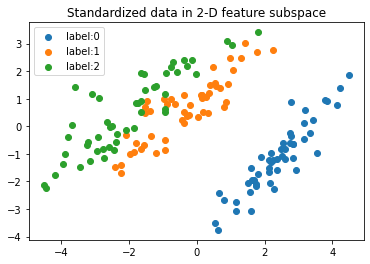

In [33]:
def main():
    eval()
    viz()

if __name__ == "__main__":
    main()

**1e.** 

While reducing the dimensionality from 2 to 1, PCA might produce misleading results when there are no redunant feature variables. That is when PCA is unable to find an axis along which majority of the variation in the variables can be explained.



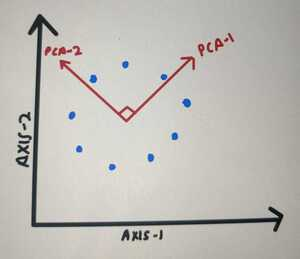